## EDA

In [93]:
!pip install kagglehub

In [94]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ardayavuzkeskin/istanbul-retail-trends-a-customer-behavior-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Kaan\.cache\kagglehub\datasets\ardayavuzkeskin\istanbul-retail-trends-a-customer-behavior-dataset\versions\1


In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [96]:
df = pd.read_csv(r"C:\DSML Bootcamp\project\shopping behavior\istanbul_sales_data.csv.csv")
df = pd.DataFrame(df)

In [97]:

print(df.columns)

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')


### **Checking and removing missing values**

In [99]:
#check and clean the data
fehlende_werte = df.isnull().sum()#check
print(fehlende_werte)

df_cleaned = df.dropna()#clean
df = df_cleaned


invoice_no        0
customer_id       1
gender            1
age               1
category          1
quantity          1
price             1
payment_method    1
invoice_date      1
shopping_mall     1
dtype: int64


In [100]:
fehlende_werte = df.isnull().sum()#check
print(fehlende_werte)

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


### **Creating a SQL file from the CSV**

In [ ]:
df.to_csv("cleaned_data.csv", index=True)  # Keep index (User_ID)
# Quick confirmation
print("Cleaned dataset saved successfully.")
# Verbindung zur SQLite-DB    

conn = sqlite3.connect("meine_datenbank.db")
# In Tabelle schreiben (wird automatisch erstellt oder ersetzt)
df.to_sql("personen", conn, if_exists="replace", index=False)
conn.close()

Cleaned dataset saved successfully.


### **Univariate Analysis**

In [102]:
df.shape #checking rows and columns

(503, 10)

In [103]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, 0 to 502
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      503 non-null    object 
 1   customer_id     503 non-null    object 
 2   gender          503 non-null    object 
 3   age             503 non-null    float64
 4   category        503 non-null    object 
 5   quantity        503 non-null    float64
 6   price           503 non-null    float64
 7   payment_method  503 non-null    object 
 8   invoice_date    503 non-null    object 
 9   shopping_mall   503 non-null    object 
dtypes: float64(3), object(7)
memory usage: 43.2+ KB


In [104]:
df.nunique() #checking unique values

invoice_no        503
customer_id       371
gender              2
age                54
category            8
quantity            5
price              38
payment_method      3
invoice_date      322
shopping_mall       9
dtype: int64

In [136]:
df.set_index("invoice_no")#setting customer_id as index

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
invoice_no,,,,,,,,,
I100001,C313884,Female,28.0,Clothing,2.0,600.16,Credit Card,2023-05-18,Istinye Park
I100002,C311565,Male,22.0,Technology,1.0,2100.00,Credit Card,2024-02-12,Zorlu Center
I100003,C366599,Male,20.0,Clothing,1.0,300.08,Cash,2023-09-11,Metrocity
I100004,C388172,Female,66.0,Books,5.0,75.75,Credit Card,2024-01-28,Metropol AVM
I100005,C389076,Female,53.0,Cosmetics,4.0,162.64,Cash,2023-10-24,Cevahir AVM
...,...,...,...,...,...,...,...,...,...
I100499,C319088,Male,39.0,Technology,3.0,6300.00,Cash,2023-03-01,Emaar Square Mall
I100500,C359469,Female,54.0,Clothing,2.0,600.16,Credit Card,2024-05-07,Istinye Park
I100501,C349248,Male,27.0,Souvenir,2.0,41.90,Credit Card,2023-04-18,Cevahir AVM


In [106]:
cat = df.select_dtypes(exclude="number")
num = df.select_dtypes(include="number")

In [107]:
cat.columns

Index(['invoice_no', 'customer_id', 'gender', 'category', 'payment_method',
       'invoice_date', 'shopping_mall'],
      dtype='object')

In [108]:

cat.gender.unique()


array(['Female', 'Male'], dtype=object)

In [109]:
cat.shopping_mall.unique()

array(['Istinye Park', 'Zorlu Center', 'Metrocity', 'Metropol AVM',
       'Cevahir AVM', 'Kanyon', 'Forum Istanbul', 'Akasya',
       'Emaar Square Mall'], dtype=object)

In [110]:
cat.payment_method.unique()

array(['Credit Card', 'Cash', 'Debit Card'], dtype=object)

In [111]:
cat.category.unique()

array(['Clothing', 'Technology', 'Books', 'Cosmetics', 'Food & Beverage',
       'Shoes', 'Souvenir', 'Toys'], dtype=object)

In [112]:
geschlechtsverteilung = df['gender'].value_counts()
geschlechtsverteilung

gender
Female    257
Male      246
Name: count, dtype: int64

<Axes: xlabel='gender'>

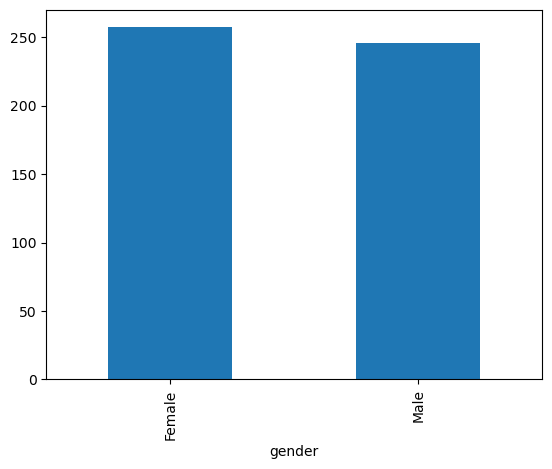

In [113]:
geschlechtsverteilung.plot(kind='bar')

In [114]:
shoppingmals = df['shopping_mall'].value_counts()
shoppingmals

shopping_mall
Zorlu Center         60
Metropol AVM         60
Istinye Park         59
Metrocity            58
Kanyon               57
Forum Istanbul       57
Cevahir AVM          56
Akasya               48
Emaar Square Mall    48
Name: count, dtype: int64

<Axes: xlabel='shopping_mall'>

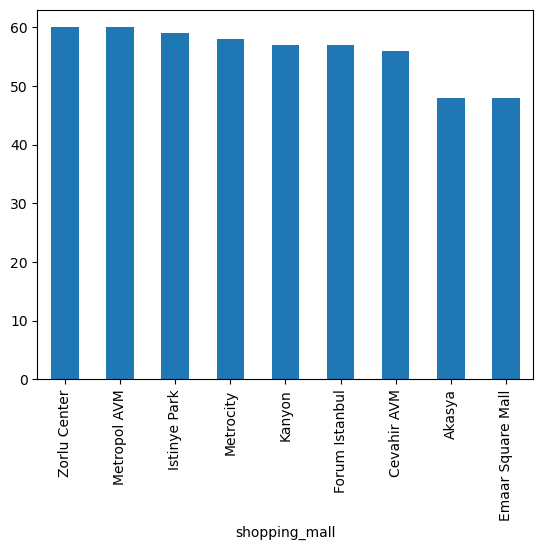

In [115]:
shoppingmals.plot(kind='bar')

In [116]:
paymentmethod = df['payment_method'].value_counts()
paymentmethod

payment_method
Credit Card    257
Cash           126
Debit Card     120
Name: count, dtype: int64

<Axes: xlabel='payment_method'>

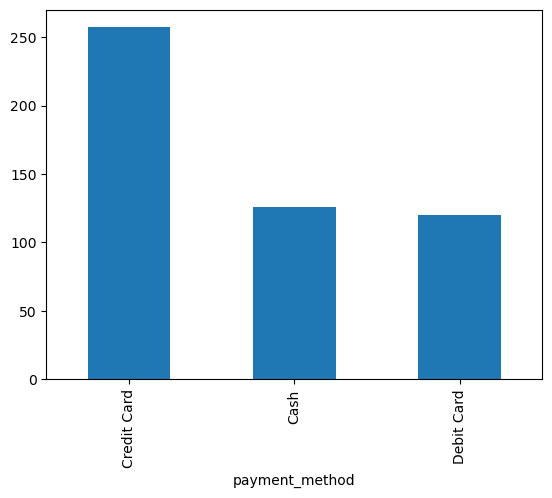

In [117]:
paymentmethod.plot(kind='bar')

In [118]:
category_verteilung = df['category'].value_counts()
category_verteilung

category
Clothing           80
Food & Beverage    71
Technology         70
Shoes              68
Books              61
Cosmetics          60
Toys               49
Souvenir           44
Name: count, dtype: int64

<Axes: xlabel='category'>

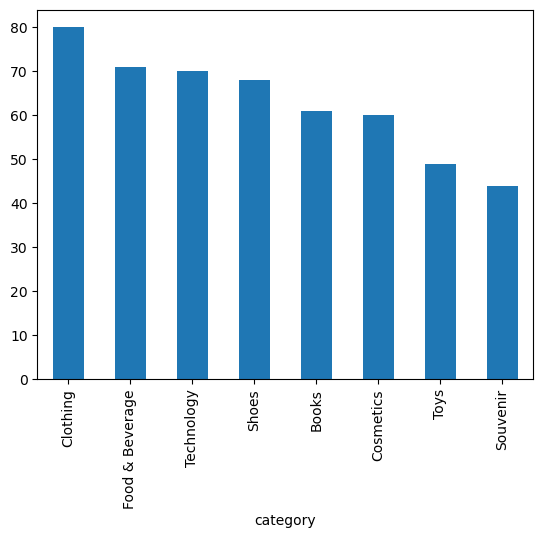

In [119]:
category_verteilung.plot(kind='bar')

In [120]:
num.columns

Index(['age', 'quantity', 'price'], dtype='object')

In [121]:
num["age"].describe()
#youngest = 18
#avg_age = 41
#oldest = max

count    503.000000
mean      40.862823
std       13.424982
min       18.000000
25%       30.000000
50%       39.000000
75%       51.000000
max       72.000000
Name: age, dtype: float64

In [122]:
num["quantity"].describe()
#2,7 units bought on avg
#min =1
#max=5

count    503.000000
mean       2.697813
std        1.321043
min        1.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        5.000000
Name: quantity, dtype: float64

In [123]:
num["price"].describe()
#avg pice = 1206.42TL
#cheapest = 5.23TL
#most expensive = 26250TL


count      503.000000
mean      1206.421948
std       3064.507191
min          5.230000
25%         41.900000
50%        143.360000
75%        900.240000
max      26250.000000
Name: price, dtype: float64

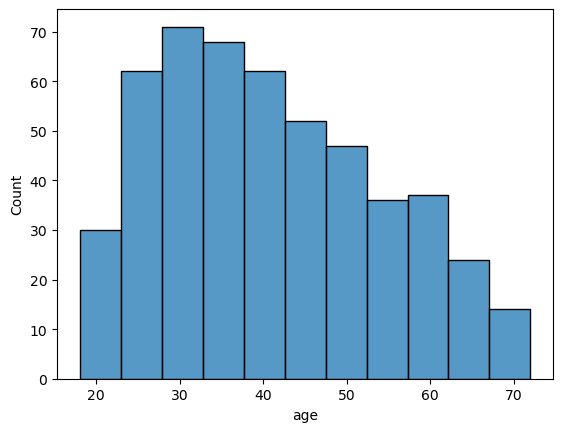

In [124]:
sns.histplot(num.age, bins="auto")
plt.show()

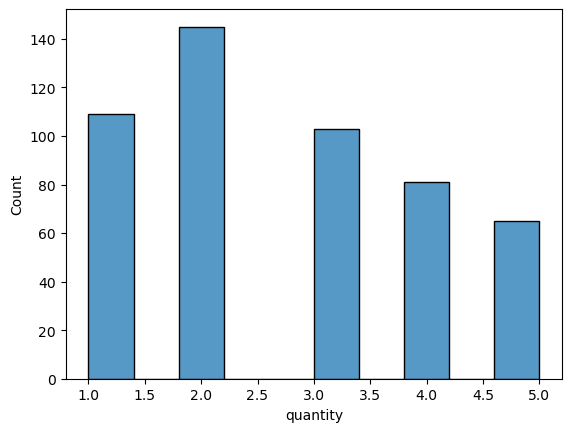

In [125]:
sns.histplot(num.quantity, bins="auto")
plt.show()

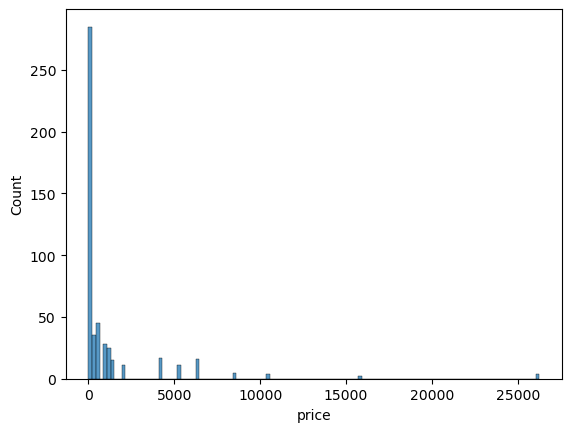

In [126]:
sns.histplot(num.price, bins="auto")
plt.show()

### **Bivariate Analysis**

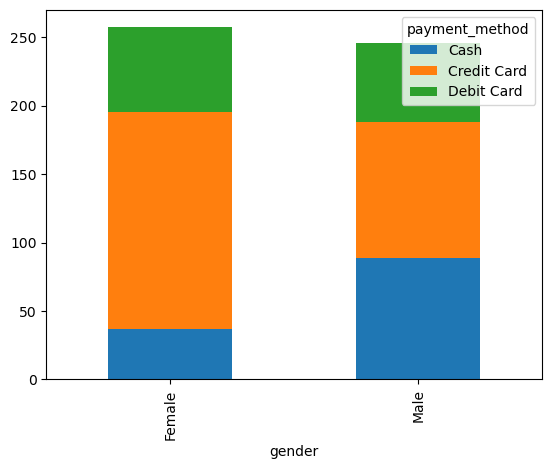

In [127]:
#What effect does the gender have on payment type
crosstab_gender_payment = pd.crosstab(cat['gender'], cat['payment_method'])
crosstab_gender_payment.plot(kind='bar', stacked=True)
plt.show()

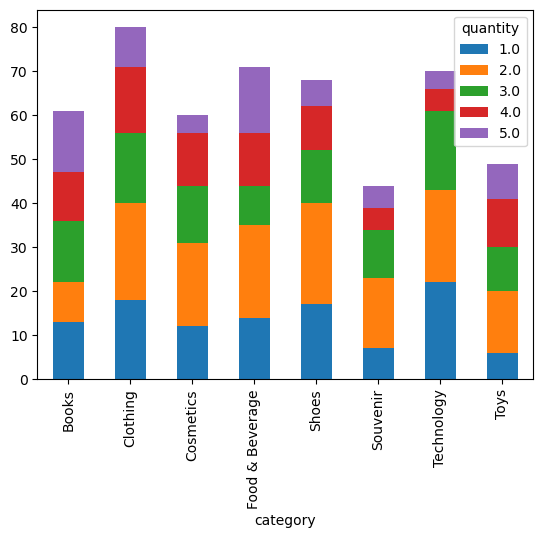

In [ ]:

crosstab_cat_price = pd.crosstab(cat['category'], num['quantity'] )
crosstab_cat_price.plot(kind='bar', stacked=True)
plt.show()

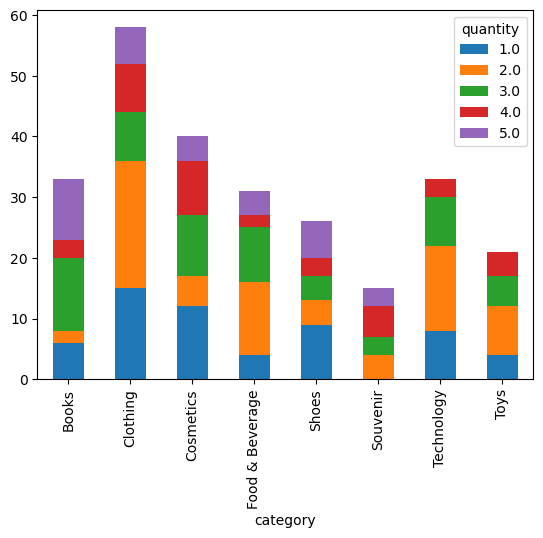

In [ ]:
df_female =df[df["gender"]== "Female"]
crosstab_cat_price = pd.crosstab(df_female['category'], df_female['quantity'] )
crosstab_cat_price.plot(kind='bar', stacked=True)
plt.show()

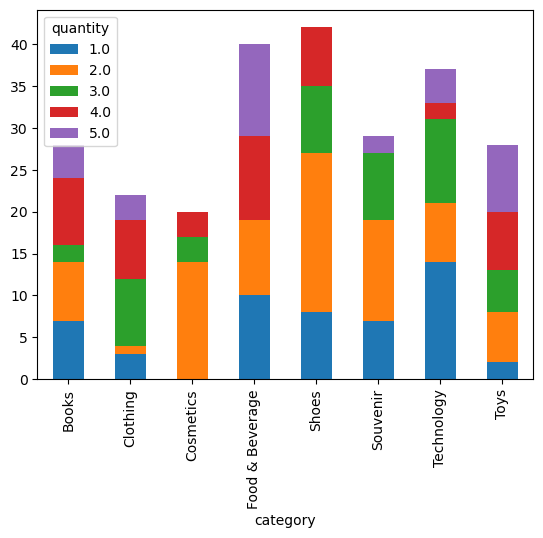

In [ ]:
df_male = df[df["gender"]=="Male"]
crosstab_cat_price = pd.crosstab(df_male['category'], df_male['quantity'] )
crosstab_cat_price.plot(kind='bar', stacked=True)
plt.show()

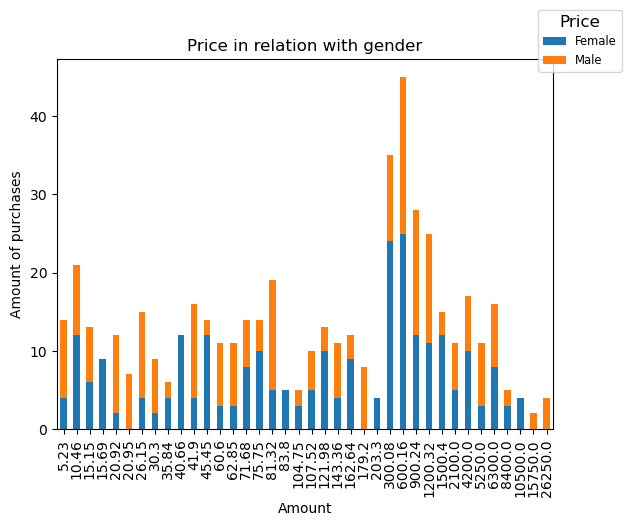

In [ ]:

crosstab_price_quantity = pd.crosstab(num['price'], cat['gender'])

crosstab_price_quantity.plot(kind='bar', stacked=True)

plt.title('Price in relation with gender')
plt.xlabel('Amount')
plt.ylabel('Amount of purchases')
plt.legend(
    title='Price',
    fontsize='small',
    loc='upper right',
    bbox_to_anchor=(1.15, 1.15),
    title_fontsize='large'
    )
#min -> max color
plt.show()